<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_Standardization_(or)_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

- The **z-score** method (often called **standardization**) transforms the data into a distribution with a **mean of 0** and a **standard deviation of 1**.

- Each standardized value is computed by subtracting the **mean** of the corresponding feature and then dividing by the **standard deviation.**

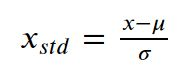

- Unlike **min-max scaling**, the **z-score** does not rescale the feature to a fixed range. The **z-score** typically ranges from **-3.00 to 3.00** (more than 99% of the data) if the input is normally distributed. However, the standardized values can also be higher or lower, as shown in the picture below.

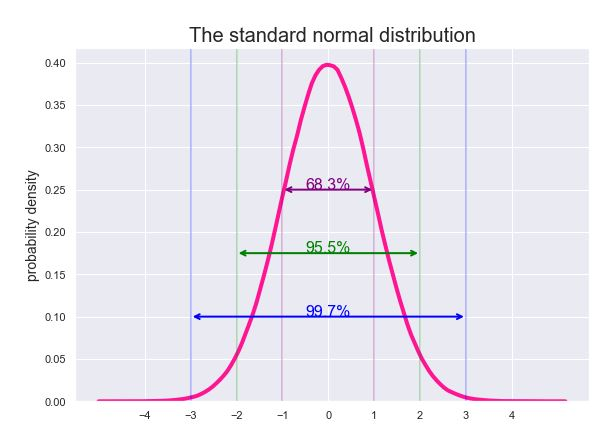

- It is important to bear in mind that **z-scores** are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input.

- This transformed distribution has a **mean of 0** and a **standard deviation of 1** and is going to be the **standard normal distribution** (see the image above) only if the input feature follows a normal distribution.

- We can compute the **z-score** in **Pandas** using the **.mean() and std()** methods.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])

df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


### **PANDAS**

In [3]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_cars_standardized = z_score(df_cars)

df_cars_standardized

,odometer_reading,fuel_economy
0,-1.189512,-0.659120
1,-0.077019,-0.499139
2,-0.718842,0.876693
3,0.778745,1.260647
4,1.206628,-0.979081


### **SCIKIT**

- Alternatively, we can use the **StandardScaler** class available in the **Scikit-learn** library to perform the z-score.

- First, we create a **standard_scaler** object.

- Then, we calculate the parameters of the transformation (in this case the **mean** and the **standard deviation**) using the **.fit()** method.

- Next, we call the **.transform()** method to apply the standardization to the data frame. The .transform() method uses the parameters generated from the .fit() method to perform the z-score.

In [4]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df_cars), columns=df_cars.columns)

df_std

,odometer_reading,fuel_economy
0,-1.329915,-0.736918
1,-0.086110,-0.558055
2,-0.803690,0.980173
3,0.870664,1.409446
4,1.349051,-1.094646


- To simplify the code, we have used the **.fit_transform()** method which combines both methods (fit and transform) together.

- As you can observe, the results differ from those obtained using **Pandas**. The **StandardScaler** function calculates the **population standard deviation** where the sum of squares is divided by **N (number of values in the population).**

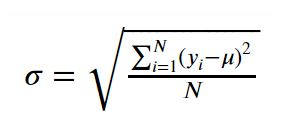

- On the contrary, the **.std() method** calculates the **sample standard deviation** where the denominator of the formula is **N-1** instead of **N**.

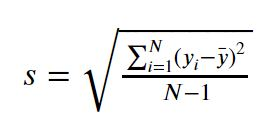

- To obtain the same results with Pandas, we set the parameter **ddof** equal to 0 (default value is ddof=1) which represents the divisor used in the calculations **(N-ddof)**.

In [5]:
# population standard deviation with Pandas
df_cars.std(ddof=0)

odometer_reading    104517.941044
fuel_economy             2.795425
dtype: float64

- We can obtain the parameters calculated by the **fit** function for standardizing the data with the **mean_** and **scale_** attributes. As you can observe, we obtain the same results in **Scikit-learn and Pandas** when setting the parameter **ddof equals to 0 in the .std() method.**

In [6]:
# standard deviation for standardizing the data
std_scaler.scale_

array([1.04517941e+05, 2.79542483e+00])

In [7]:
# mean for standardizing the data
std_scaler.mean_

array([2.590e+05, 1.306e+01])

- The following plot shows the data after applying the z-score method which is computed using the population standard deviation (divided by N).

Text(0.5, 1.0, 'The Z Score method')

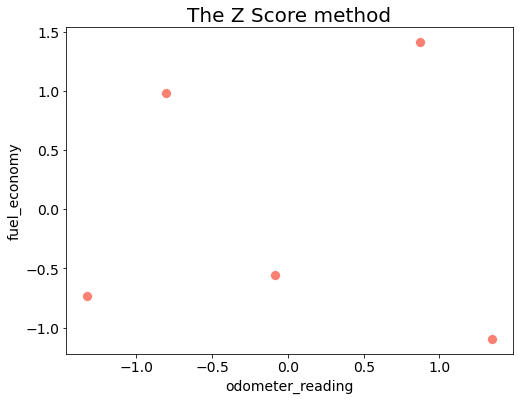

In [9]:
plt.figure(figsize=(8,6))

# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='odometer_reading', y='fuel_economy', data=df_std, s=100, color='salmon')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('odometer_reading', fontsize=14)
plt.ylabel('fuel_economy', fontsize=14)
plt.title('The Z Score method', fontsize=20)